# Introduction to Statistical Mechanics (ME346A)

## Diffusion and Classical Mechanics + Thermodynamics

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

### Problem 1

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# (a) Make observations
def obsv(n):
  return 2 * (np.random.rand(n) > 0.5) - 1

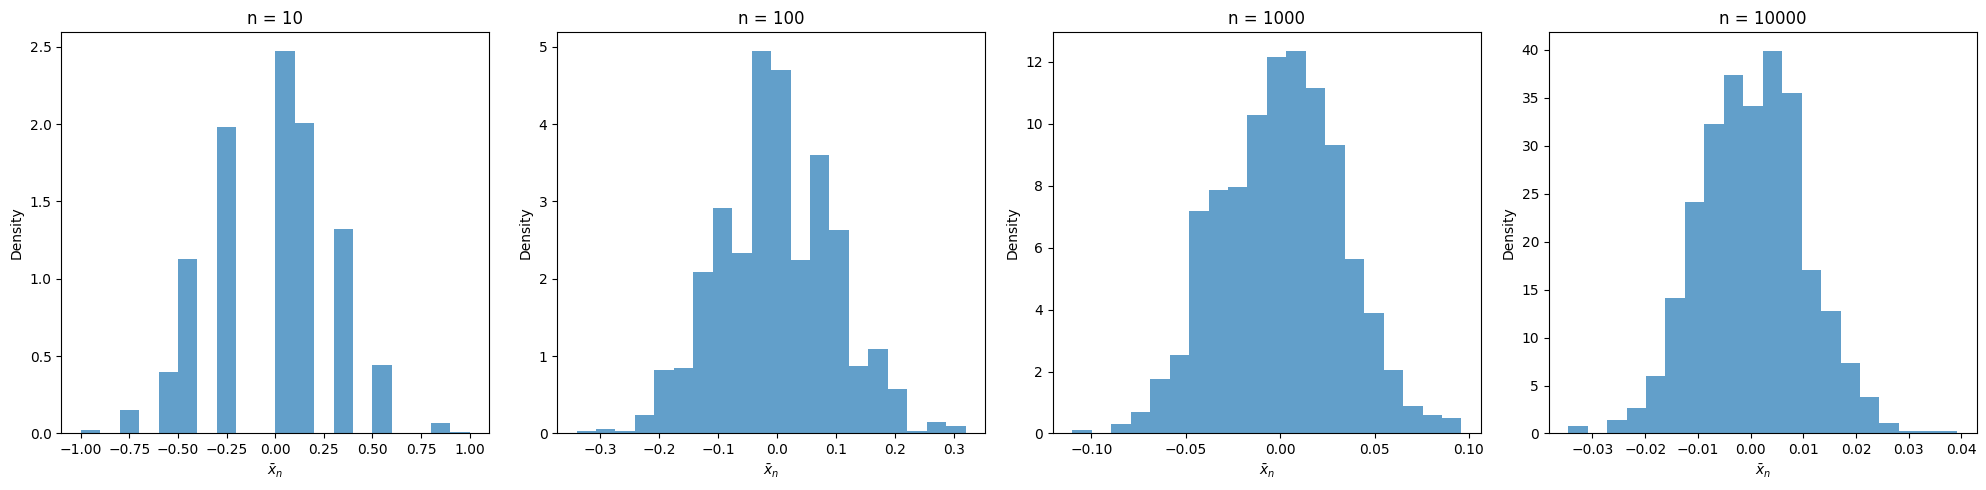

In [3]:
# (b) Take average
def xbar(n):
  return np.mean(obsv(n))

def xbars(n, n_obsv):
  obsvs = 2 * (np.random.rand(n, n_obsv) > 0.5) - 1
  return np.mean(obsvs, axis=0)

n_obsv = 1000
ns = [10, 100, 1000, 10000]
xbs = [xbars(n=n, n_obsv=n_obsv) for n in ns]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# fig.suptitle('Normalized Histograms of Sample Means for Different Sample Sizes')

for i, (n, xb) in enumerate(zip(ns, xbs)):
    axs[i].hist(xb, bins=20, density=True, alpha=0.7)
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel(r'$\bar{x}_n$')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

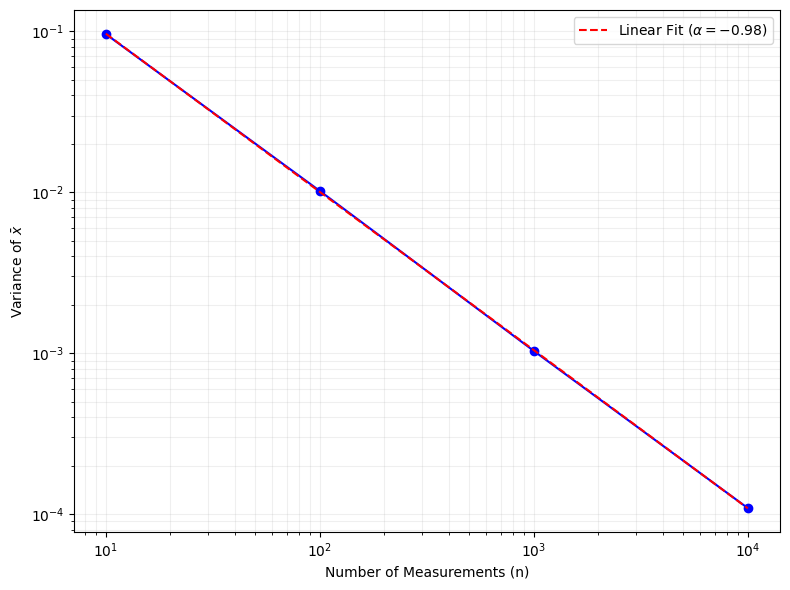

In [ ]:
# (c), (d) Variance - alpha ~ -1
vars = [np.mean(xb**2) - (np.mean(xb))**2 for xb in xbs]

plt.figure(figsize=(8, 6))
plt.loglog(ns, vars, 'bo-')  # 'bo-' means blue color, circle markers, solid line
plt.xlabel('Number of Measurements (n)')
plt.ylabel(r'Variance of $\bar x$')
# plt.title('Variance of Sample Mean vs. Sample Size (Log-Log Plot)')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add a reference line with slope -1
log_ns = np.log(ns)
log_vars = np.log(vars)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_ns, log_vars)
fit_x = np.array([min(ns), max(ns)])
fit_y = np.exp(intercept + slope * np.log(fit_x))
plt.loglog(fit_x, fit_y, 'r--', label=rf'Linear Fit ($\alpha = {slope:.2f}$)')

plt.legend()
plt.tight_layout()
plt.show()

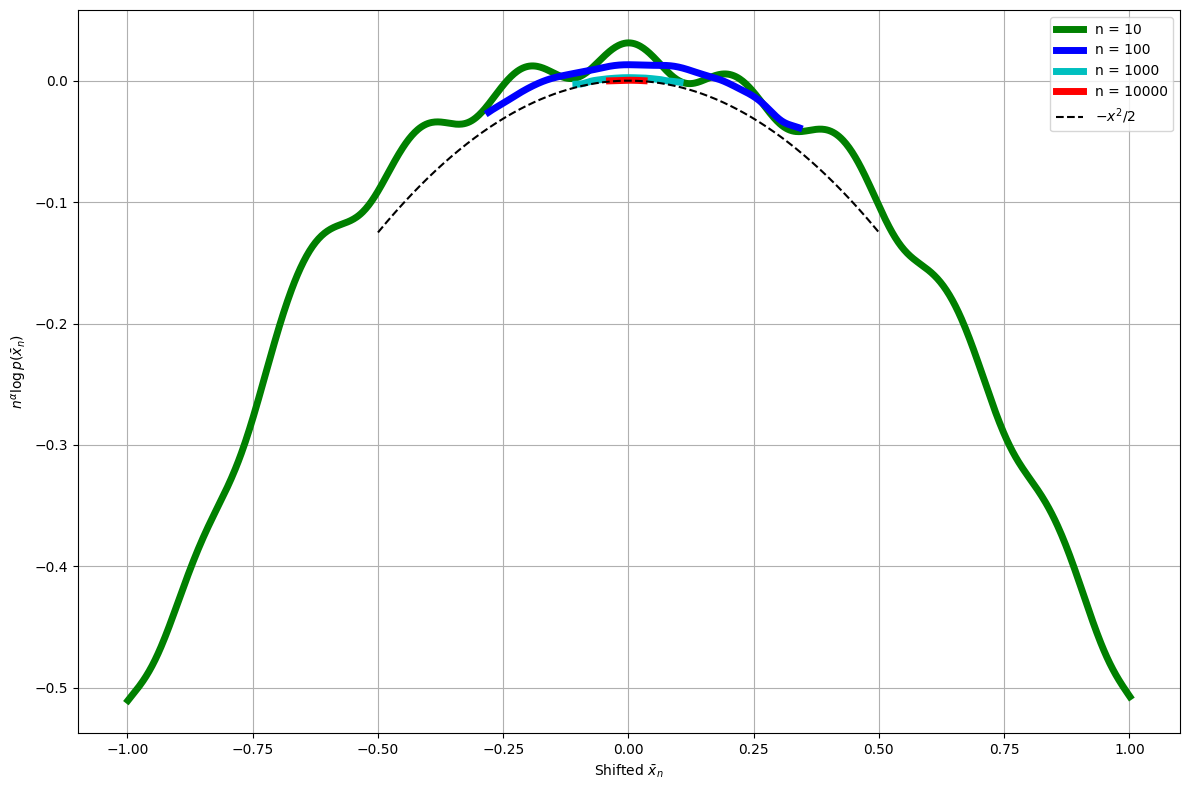

In [ ]:
# (e), (f) Sharper Gaussian
alpha = -1.0
colors = ['g', 'b', 'c', 'r']

plt.figure(figsize=(12, 8))
for n, color in zip(ns, colors):
    xb = xbs[ns.index(n)]

    kde = stats.gaussian_kde(xb) # kernel density estimation
    x_range = np.linspace(xb.min(), xb.max(), 1000)
    p = kde(x_range)

    max_index = np.argmax(p)
    max_x = x_range[max_index]
    x_shifted = x_range - max_x

    y = n**alpha * np.log(p)

    plt.plot(x_shifted, y, color=color, label=f'n = {n}', linewidth=5.0)

x = np.linspace(-0.5, 0.5, 1000)
plt.plot(x, -x**2/2, 'k--', label=r'$-x^2/2$')
plt.xlabel(r'Shifted $\bar x_n$')
plt.ylabel(r'$n^\alpha \log p(\bar{x}_n)$')
# plt.title(r'Scaled log probability density for different $n$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Problem 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

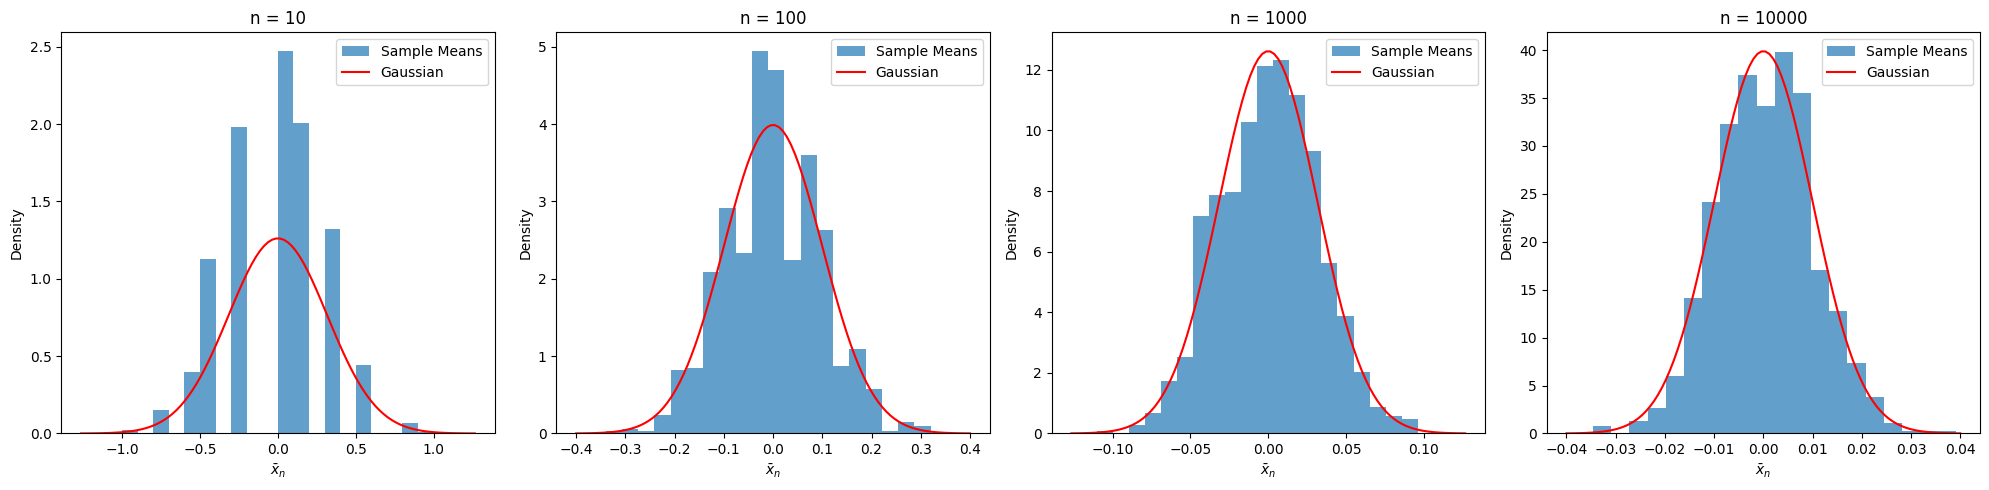

In [7]:
ns = [10, 100, 1000, 10000]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# fig.suptitle('Comparison of Sample Means Histogram with Gaussian Distribution')

for i, (n, xb) in enumerate(zip(ns, xbs)):
    # Empirical distribution
    axs[i].hist(xb, bins=20, density=True, alpha=0.7, label='Sample Means')

    # Gaussian distribution
    mu = 0
    sigma = 1 / np.sqrt(n)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    y = norm.pdf(x, mu, sigma)

    axs[i].plot(x, y, 'r-', label='Gaussian')

    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel(r'$\bar{x}_n$')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()